In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [249]:
data=pd.read_csv('/content/drive/MyDrive/heart_disease/heart_2020_cleaned.csv')

In [250]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [251]:
data.shape

(319795, 18)

Lets check whether data is balanced or not

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


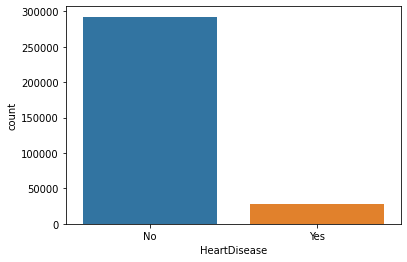

In [252]:
sns.countplot(data['HeartDisease'])

we can see data is not balanced by above plot

lets find the count of each categories ie is yes or no

In [253]:
len(data[data['HeartDisease']=='No']),len(data[data['HeartDisease']=='Yes'])

(292422, 27373)

Is there any null values from the survey?

In [254]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [255]:
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["HeartDisease"]]
# Store the variable we are predicting 
target = "HeartDisease"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(319795, 17)
(319795,)


Numerical Variables

In [256]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


Categorical variables

In [257]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
data[categorical_features].head()

Number of categorical variables:  14


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [258]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 1


['SleepTime']

In [259]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Variables Count: {}".format(len(continuous_feature)))
continuous_feature

Continuous Variables Count: 3


['BMI', 'PhysicalHealth', 'MentalHealth']

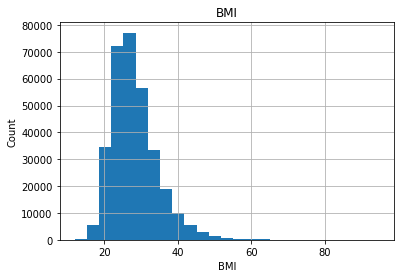

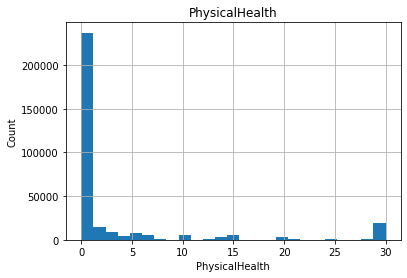

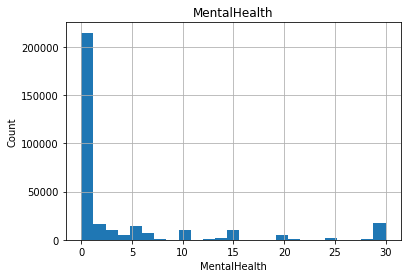

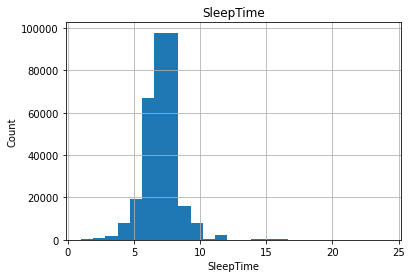

In [260]:
for feature in numerical_features:
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

LETS FIRST WORK ON BMI feature

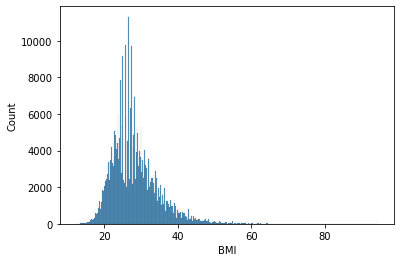

In [261]:
sns.histplot(data['BMI'])

min,max,mean and median for BMI

In [262]:
print("BMI_min :",data['BMI'].min()) 
print("BMI_max :",data['BMI'].max()) 
print("BMI_mean :",data['BMI'].mean()) 
print("BMI_median :",data['BMI'].median()) 

BMI_min : 12.02
BMI_max : 94.85
BMI_mean : 28.325398520926328
BMI_median : 27.34


Oultiers in BMI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


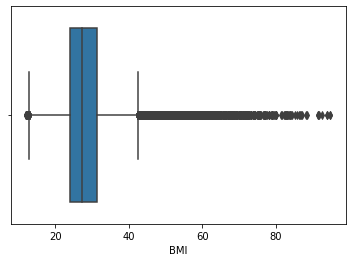

In [263]:
sns.boxplot(data['BMI'])

In [264]:
len(data[data['BMI']>40])

16350

In [265]:
temp_no=data[data['HeartDisease']=='No']
temp_yes=data[data['HeartDisease']=='Yes']

In [266]:
temp_no.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [267]:
temp_no['BMI'].mean()

28.22465833623946

In [268]:
temp_yes['BMI'].mean()

29.40159207978655

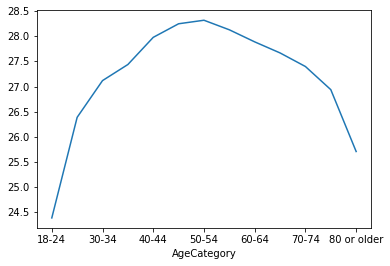

In [269]:
data.groupby('AgeCategory')['BMI'].median().plot()

we can see that most of the people between 30-80 yrs  of age are having BMI in range of 26-28

Also we can see how the BMI is changing with age category as people with age category 18-30 age has BMI between 24.5-27.0. We can say that the ratio of their weight with height is likely to be near the actual BMI ratio that they should have.



BMI = x KG / (y M * y M)
By above formula we can also say that people between 40-60 yrs of age are tend to have more weight, may be because of less physical work or other factors.

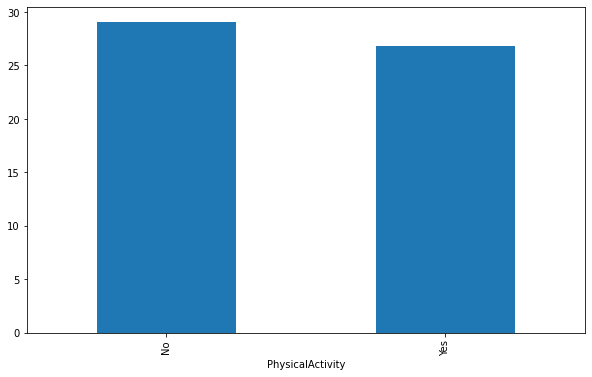

In [270]:
plt.figure(figsize=(10,6))
data.groupby('PhysicalActivity')['BMI'].median().plot(kind='bar')

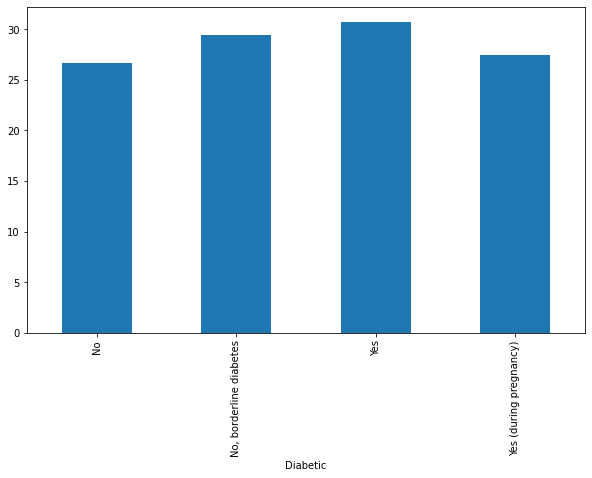

In [271]:
plt.figure(figsize=(10,6))
data.groupby('Diabetic')['BMI'].median().plot(kind='bar')

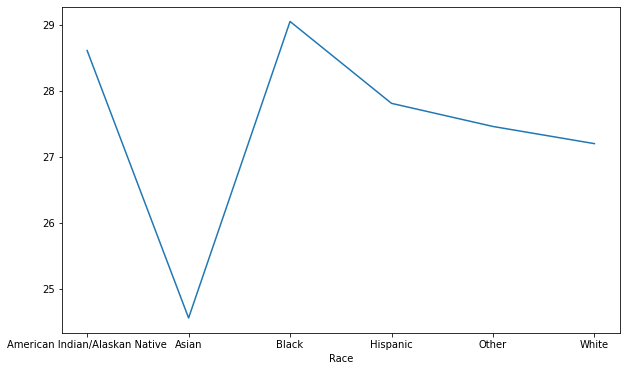

In [272]:
plt.figure(figsize=(10,6))
data.groupby('Race')['BMI'].median().plot()

above we can see how the BMI is changing with race too. SO may be the region living in can be also a factor.

BMI for people consuming alcohol and smoking

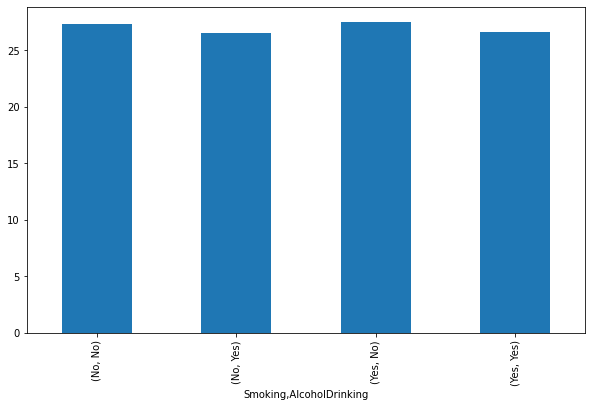

In [273]:
plt.figure(figsize=(10,6))
data.groupby(['Smoking','AlcoholDrinking'])['BMI'].median().plot(kind='bar')

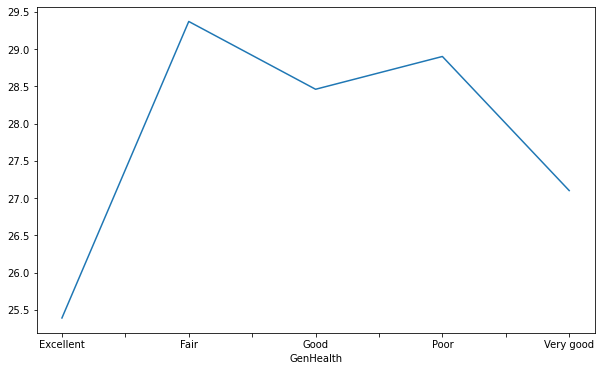

In [274]:
plt.figure(figsize=(10,6))
data.groupby('GenHealth')['BMI'].median().plot()

PHYSICAL HEALTH

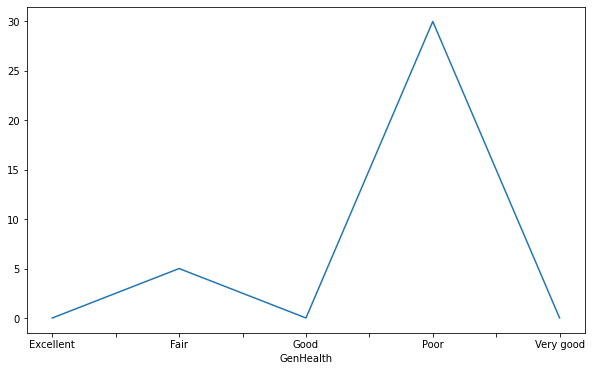

In [275]:
plt.figure(figsize=(10,6))
data.groupby('GenHealth')['PhysicalHealth'].median().plot()

outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


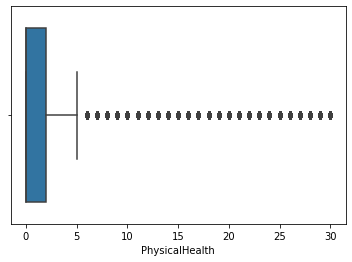

In [276]:
sns.boxplot(data['PhysicalHealth'])

We can say that the people who are not having good physical health for more than 5 days in a period of 3o days has their health health between fair to poor

In [277]:
data['PhysicalHealth'].mean()

3.3717100017198516

In [278]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


min max and mean number of days where physical health was bad and also stroke occured

In [279]:
temp=data[data['Stroke']=='Yes']
print("min days of bad physical health :", temp['PhysicalHealth'].min())
print("max days of bad physical health :", temp['PhysicalHealth'].max())
print("median days of bad physical health :", temp['PhysicalHealth'].median())
print("mean days of bad physical health :", temp['PhysicalHealth'].mean())


min days of bad physical health : 0.0
max days of bad physical health : 30.0
median days of bad physical health : 1.0
mean days of bad physical health : 8.87248322147651


min max and mean number of days where physical health was bad and also has heart disease occured

In [280]:
temp=data[data['HeartDisease']=='Yes']
print("min days of bad physical health :", temp['PhysicalHealth'].min())
print("max days of bad physical health :", temp['PhysicalHealth'].max())
print("median days of bad physical health :", temp['PhysicalHealth'].median())
print("mean days of bad physical health :", temp['PhysicalHealth'].mean())


min days of bad physical health : 0.0
max days of bad physical health : 30.0
median days of bad physical health : 0.0
mean days of bad physical health : 7.8082416980236


bad physical health for people having smoking and alcohol drinking

In [281]:
temp=data[data['Smoking']=='Yes']
temp=temp[temp['AlcoholDrinking']=='Yes']
print("min days of bad physical health :", temp['PhysicalHealth'].min())
print("max days of bad physical health :", temp['PhysicalHealth'].max())
print("mean days of bad physical health :", temp['PhysicalHealth'].mean())


min days of bad physical health : 0.0
max days of bad physical health : 30.0
mean days of bad physical health : 3.419754006708908


Sleep time and mental health

In [282]:
temp=data[data['Smoking']=='Yes']
temp=temp[temp['AlcoholDrinking']=='Yes']

print("average sleep time :", temp['SleepTime'].mean())


average sleep time : 7.033171822586657


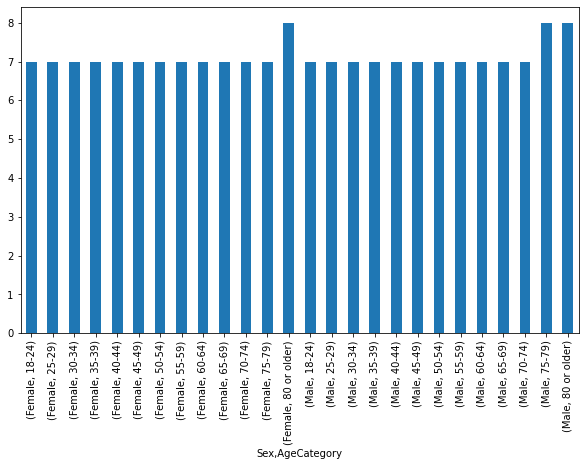

In [283]:
plt.figure(figsize=(10,6))
data.groupby(['Sex','AgeCategory'])['SleepTime'].median().plot(kind='bar')

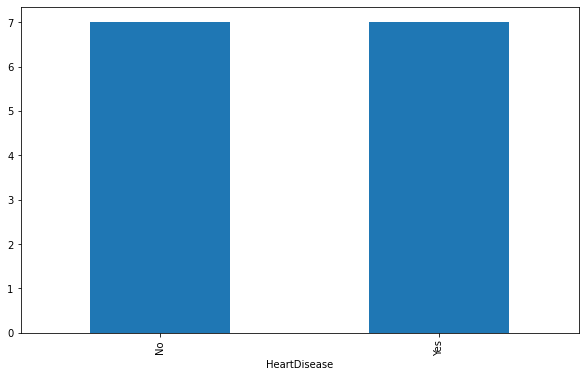

In [284]:
plt.figure(figsize=(10,6))
data.groupby('HeartDisease')['SleepTime'].median().plot(kind='bar')

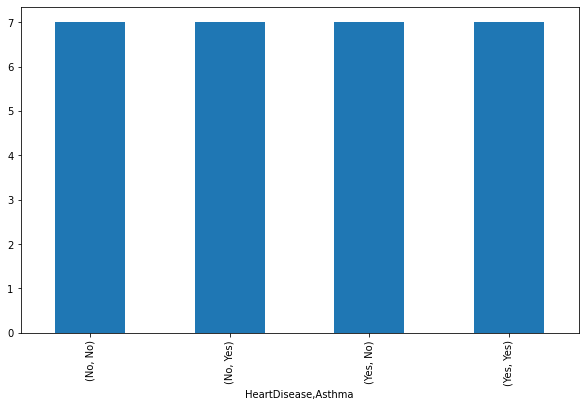

In [285]:
plt.figure(figsize=(10,6))
data.groupby(['HeartDisease','Asthma'])['SleepTime'].median().plot(kind='bar')

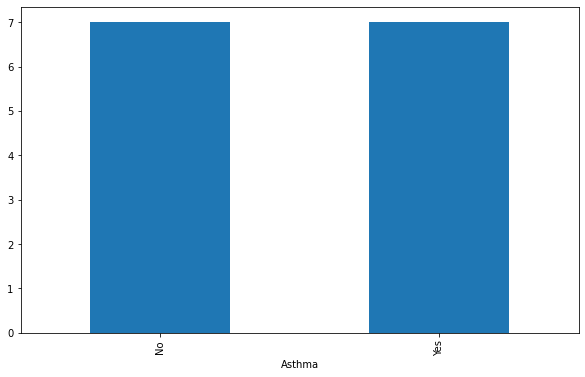

In [286]:
plt.figure(figsize=(10,6))
data.groupby('Asthma')['SleepTime'].median().plot(kind='bar')

In [287]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [288]:
temp=data[data['HeartDisease']=='Yes']
print("average sleep time :", temp['SleepTime'].mean())
print("average days of bad mental health :", temp['MentalHealth'].mean())

average sleep time : 7.136156066196617
average days of bad mental health : 4.64176378182881


SMOKING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


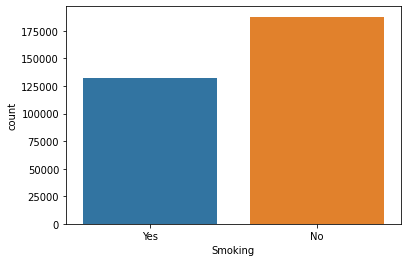

In [289]:
sns.countplot(data['Smoking'])

In [290]:
temp_yes=data[data['HeartDisease']=='Yes']


count of people with heart disease

In [291]:
len(temp_yes)

27373

Count of people having asthma and heart disease

In [292]:
len(temp_yes[temp_yes['Asthma']=='Yes'])

4933

count of people having skin cancer and heart disease

In [293]:
temp_yes['SkinCancer'].value_counts()

No     22393
Yes     4980
Name: SkinCancer, dtype: int64

In [294]:
len(temp_yes[temp_yes['SkinCancer']=='Yes'])

4980

count of people having skin cancer asthma and heartdisease

In [295]:
temp=temp_yes[temp_yes['SkinCancer']=='Yes']
len(temp[temp['Asthma']=='Yes'])

813

Count of people having heartdiease and doesnt do any physical activity

In [296]:
len(temp_yes[temp_yes['PhysicalActivity']=='No'])

9884

In [297]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [298]:
continuous_feature

['BMI', 'PhysicalHealth', 'MentalHealth']

In [299]:
df=data.copy()

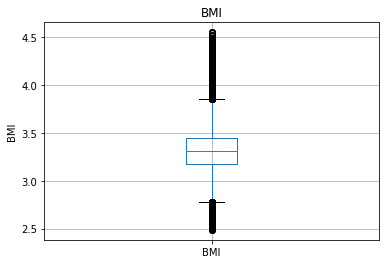

In [300]:
data['BMI']=np.log(data['BMI'])
data.boxplot(column='BMI')
plt.ylabel('BMI')
plt.title('BMI')
plt.show()